# Import all necessary libraries.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
import networkx.algorithms.community as nxcom

# Summary

## In this Jupyter notebook, our initial focus was on examining the centrality of individual nodes within the network, aiming to unveil their significance in bridging different network segments. Utilizing metrics such as degree centrality, betweenness centrality, and closeness centrality, we sought out pivotal nodes crucial for fostering connections and facilitating the flow of information throughout the network.

## Following this exploration, we did a comprehensive analysis of the intricate relationships within our dataset, revolving around networks and their associated shows. At the heart of our investigation lies the construction of a bipartite network, serving as the bedrock of our exploration. This sophisticated network architecture, with nodes representing both networks and shows, intricately connected by edges indicative of shared audience interests, offered a nuanced portrayal of the underlying relationships present within the dataset.


# Read the file involving Critic reviews and shows (ModifiedCritic.csv)

In [2]:
modified_audience_df = pd.read_csv("D:/Spring 2024 notes/Social Media Analytics/SMA_Project/ModifiedAudience.csv")
print(modified_audience_df)

       Unnamed: 0                            Show  Rating  \
0               0                            Loot     2.5   
1               1                            Loot     4.5   
2               2                            Loot     0.5   
3               3                            Loot     4.5   
4               4                            Loot     0.5   
...           ...                             ...     ...   
93190       93190  Once Upon a Time in Wonderland     5.0   
93191       93191  Once Upon a Time in Wonderland     2.5   
93192       93192  Once Upon a Time in Wonderland     2.0   
93193       93193  Once Upon a Time in Wonderland     5.0   
93194       93194  Once Upon a Time in Wonderland     5.0   

                                                  Review    Network  \
0      I love the stars, but the show is riddled with...  Apple TV+   
1      Great show to watch. It's something that's eas...  Apple TV+   
2      Another Apple tanker crashes into the reef wit.

## Distribution of Shows Across Networks.

In [13]:
show_networks = modified_audience_df.groupby('Show')['Network'].agg(['unique', 'nunique']).reset_index()
show_networks.columns = ['Show', 'Networks', 'Number of Networks']
show_networks['Networks'] = show_networks['Networks'].apply(lambda x: ', '.join(x))

print("Distribution of Shows Across Networks:")
print(tabulate(show_networks, headers='keys', tablefmt='grid', showindex=False))

Distribution of Shows Across Networks:
+-------------------------------------------------+----------------------------------------+----------------------+
| Show                                            | Networks                               |   Number of Networks |
+=================================================+========================================+======================+
| 11.22.63                                        | Hulu                                   |                    1 |
+-------------------------------------------------+----------------------------------------+----------------------+
| 13 Reasons Why                                  | Prime Video, VUDU, Netflix             |                    3 |
+-------------------------------------------------+----------------------------------------+----------------------+
| 1883                                            | Paramount+                             |                    1 |
+--------------------------------

# Network Analysis. 

## Exploring Network relationships among shows and visualizing the distribution of network.

### This code snippet produces a visualization illustrating a unified network, where nodes symbolize individual shows and edges represent connections between shows established through shared audience members. This visualization offers a comprehensive view of the network's architecture, showcasing the relative prominence of each show (node) and the intensity of connections (edges) linking them.

C:\Users\adija\AppData\Local\Temp\ipykernel_25224\2920820624.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


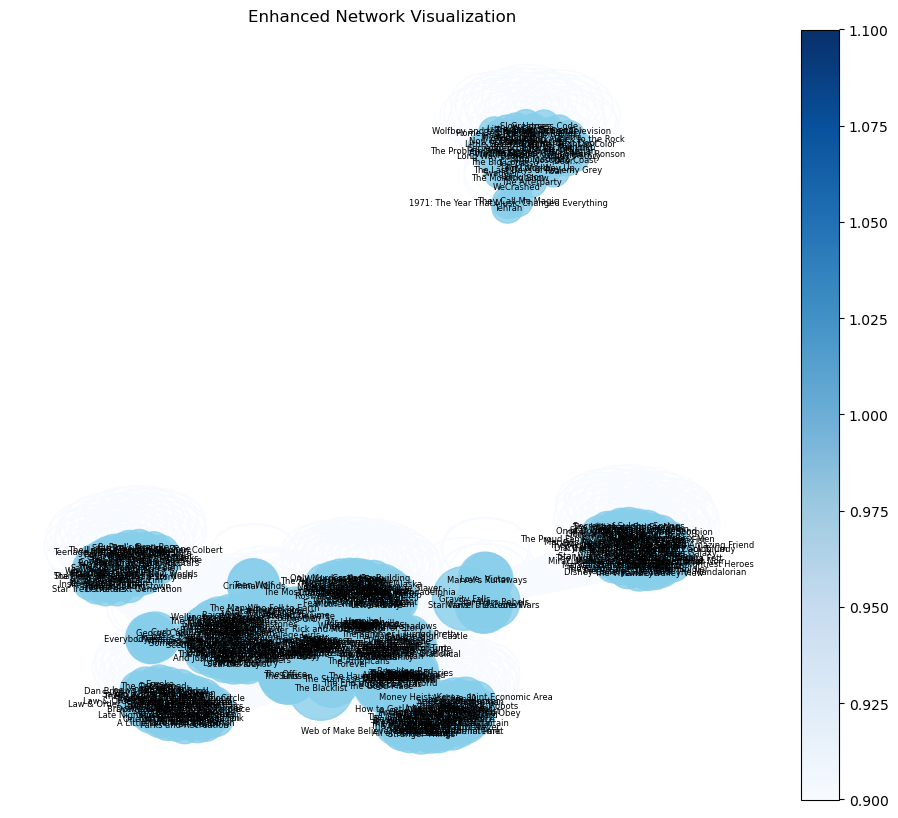

In [4]:
G = nx.Graph()

for network, group in modified_audience_df.groupby('Network'):
    shows = group['Show'].tolist()
    for i in range(len(shows)):
        for j in range(i + 1, len(shows)):
            G.add_edge(shows[i], shows[j], weight=1)
           
        
degree_centrality = nx.degree_centrality(G)
node_sizes = [5000 * degree_centrality[node] for node in G.nodes()]

edge_weights = [G[u][v].get('weight', 1) for u, v in G.edges()]
edge_colors = [edge_weight / max(edge_weights) for edge_weight in edge_weights]

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.15) 
nodes = nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=node_sizes, alpha=0.8)
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_weights, edge_cmap=plt.cm.Blues)
labels = nx.draw_networkx_labels(G, pos, font_size=6)

sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(edge_weights), vmax=max(edge_weights)))
sm.set_array([])
plt.colorbar(sm)

plt.title('Enhanced Network Visualization')
plt.axis('off')
plt.show()

## Basic Network Metrics.

In [43]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

density = nx.density(G)
print(f"Network Density: {density:.4f}")

degrees = G.degree()
avg_degree = sum(deg for _, deg in degrees) / float(num_nodes)
print(f"Average Degree: {avg_degree:.2f}")

clustering_coefficient = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {clustering_coefficient:.4f}")

Number of nodes: 562
Number of edges: 27979
Network Density: 0.1775
Average Degree: 99.57
Average Clustering Coefficient: 0.9248


## Calculating the Centrality measures Across Nodes. 

In [46]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

centrality_df = pd.DataFrame({
    'Node': list(degree_centrality.keys()),
    'Degree ': list(degree_centrality.values()),
    'Betweenness ': list(betweenness_centrality.values()),
    'Closeness ': list(closeness_centrality.values())
})

print("\n")
print("Centrality Measures for Each Node:")
print(tabulate(centrality_df, headers='keys', tablefmt='grid', showindex=False))



Centrality Measures for Each Node:
+-------------------------------------------------+-----------+----------------+--------------+
| Node                                            |   Degree  |   Betweenness  |   Closeness  |
+=================================================+===========+================+==============+
| Loot                                            | 0.103387  |    0           |    0.0998217 |
+-------------------------------------------------+-----------+----------------+--------------+
| For All Mankind                                 | 0.103387  |    0           |    0.0998217 |
+-------------------------------------------------+-----------+----------------+--------------+
| Severance                                       | 0.103387  |    0           |    0.0998217 |
+-------------------------------------------------+-----------+----------------+--------------+
| Shining Girls                                   | 0.103387  |    0           |    0.0998217 |
+--

## Graph Connectivity Check.

In [44]:
is_connected = nx.is_connected(G) if G.is_directed() == False else nx.is_strongly_connected(G)
print("Is the graph connected?:", is_connected)

Is the graph connected?: False


# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Visualization of Interconnected Networks Based on Shared Shows.

### In this code snippet, a bipartite network is formulated to depict the intricate relationship between networks and shows. This bipartite representation categorizes nodes into two distinct groups: networks and shows. Subsequently, the projection of this bipartite network onto the broader "network of networks" is undertaken, with a specific emphasis on shared shows among different networks. This projection process simplifies the network structure by focusing solely on the connections between networks that arise from shared shows. Consequently, the resulting network may exhibit a varying number of edges compared to the original network, contingent upon the extent of shared shows between pairs of networks.

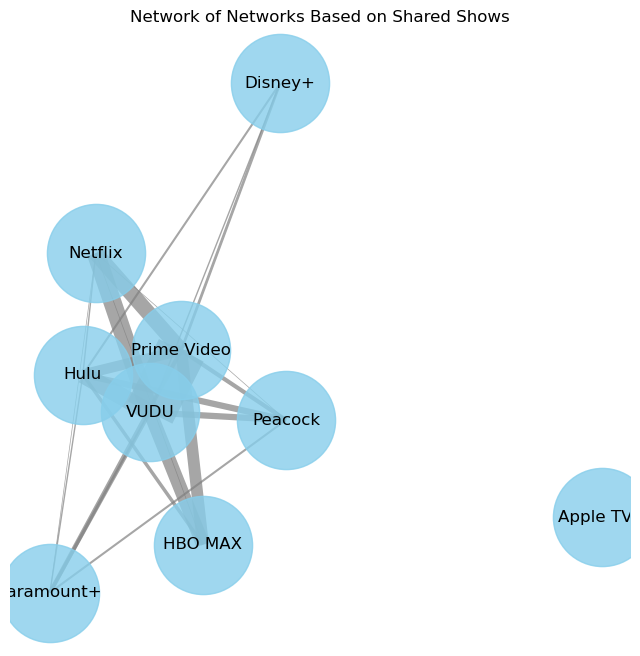

In [32]:
B = nx.Graph()
B.add_nodes_from(modified_audience_df['Network'].unique(), bipartite=0) 
B.add_nodes_from(modified_audience_df['Show'].unique(), bipartite=1)
B.add_edges_from(zip(modified_audience_df['Network'], modified_audience_df['Show']))

C = nx.bipartite.weighted_projected_graph(B, nodes=modified_audience_df['Network'].unique())
edge_widths = [C[u][v]['weight'] * 0.5 for u, v in C.edges()]  


plt.figure(figsize=(8, 8))
pos = nx.spring_layout(C, k=2.5)  
nodes = nx.draw_networkx_nodes(C, pos, node_color='skyblue', node_size=5000, alpha=0.8)
edges = nx.draw_networkx_edges(C, pos, width=edge_widths, alpha=0.7, edge_color='gray')
labels = nx.draw_networkx_labels(C, pos, font_size=12, font_family='sans-serif')

plt.title('Network of Networks Based on Shared Shows')
plt.axis('off') 
plt.show()

## Network Analysis Metrics for Bipartite Network of Networks and Shows.

In [45]:
num_nodes = B.number_of_nodes()
num_edges = B.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

density = nx.density(B)
print(f"Network Density: {density:.4f}")

degrees = B.degree()
avg_degree = sum(deg for _, deg in degrees) / float(num_nodes)
print(f"Average Degree: {avg_degree:.2f}")

clustering_coefficient = nx.average_clustering(B)
print(f"Average Clustering Coefficient: {clustering_coefficient:.4f}")

Number of nodes: 571
Number of edges: 742
Network Density: 0.0046
Average Degree: 2.60
Average Clustering Coefficient: 0.0000


## Centrality Analysis of Nodes in the Bipartite Network.

In [47]:
degree_centrality = nx.degree_centrality(B)
betweenness_centrality = nx.betweenness_centrality(B)
closeness_centrality = nx.closeness_centrality(B)

centrality_df = pd.DataFrame({
    'Node': list(degree_centrality.keys()),
    'Degree ': list(degree_centrality.values()),
    'Betweenness ': list(betweenness_centrality.values()),
    'Closeness ': list(closeness_centrality.values())
})

print("\n")
print("Centrality Measures for Each Node:")
print(tabulate(centrality_df, headers='keys', tablefmt='grid', showindex=False))



Centrality Measures for Each Node:
+-------------------------------------------------+------------+----------------+--------------+
| Node                                            |    Degree  |   Betweenness  |   Closeness  |
+=================================================+============+================+==============+
| Apple TV+                                       | 0.1        |    0.00984183  |    0.1       |
+-------------------------------------------------+------------+----------------+--------------+
| Paramount+                                      | 0.117544   |    0.171174    |    0.273914  |
+-------------------------------------------------+------------+----------------+--------------+
| Prime Video                                     | 0.163158   |    0.219195    |    0.342444  |
+-------------------------------------------------+------------+----------------+--------------+
| VUDU                                            | 0.161404   |    0.184147    |    0.341

## Graph Connectivity Check.

In [48]:
is_connected = nx.is_connected(B) if B.is_directed() == False else nx.is_strongly_connected(B)
print("Is the graph connected?:", is_connected)

Is the graph connected?: False


# Community Detection. 

## Community Detection Using Girvan-Newman Algorithm.

In [12]:
communities = nxcom.girvan_newman(G)
top_level_communities = next(communities)
sorted_communities = sorted(map(sorted, top_level_communities))

print("Detected Communities:", sorted_communities)


Detected Communities: [['11.22.63', '13 Reasons Why', '1883', '24', '30 Coins', '30 Rock', 'A Little Late With Lilly Singh', 'A Teacher', 'A Very English Scandal', 'A Wilderness of Error', 'A.P. Bio', 'Adventure Time', 'After Life', 'Alias Grace', 'All of Us Are Dead', 'Altered Carbon', 'American Auto', 'American Horror Story', 'Amsterdam', 'Anatomy of a Scandal', 'And Just Like That...', 'Angelyne', 'Animal Kingdom', 'Arcane: League of Legends', 'Archive 81', 'Arrested Development', 'Atlanta', 'Attack on Titan', 'Avatar: The Last Airbender', 'Band of Brothers', 'Banshee', 'Barry', 'Bates Motel', 'Battlestar Galactica', 'Batwoman', 'Behind Her Eyes', 'Bel-Air', 'Better Call Saul', 'Better Things', 'Big Little Lies', 'Black Mirror', 'Black Sails', 'Black Summer', 'Blindspot', 'BoJack Horseman', 'Boardwalk Empire', 'Bodyguard', 'Borgen', 'Bosch', 'Brave New World', 'Breaking Bad', 'Breeders', 'Bridgerton', 'Brooklyn Nine-Nine', 'Buffy the Vampire Slayer', 'Bull', 'Cardinal', 'Castle Rock

In [30]:
print("Number of Communities:", len(sorted_communities))
for i, community in enumerate(sorted_communities, 1):
    print(f"Community {i} (Size: {len(community)}):", community)
    print("\n")
    print("---------------------------------------------------------------------------------------------------------------------------")

Number of Communities: 3
Community 1 (Size: 430): ['11.22.63', '13 Reasons Why', '1883', '24', '30 Coins', '30 Rock', 'A Little Late With Lilly Singh', 'A Teacher', 'A Very English Scandal', 'A Wilderness of Error', 'A.P. Bio', 'Adventure Time', 'After Life', 'Alias Grace', 'All of Us Are Dead', 'Altered Carbon', 'American Auto', 'American Horror Story', 'Amsterdam', 'Anatomy of a Scandal', 'And Just Like That...', 'Angelyne', 'Animal Kingdom', 'Arcane: League of Legends', 'Archive 81', 'Arrested Development', 'Atlanta', 'Attack on Titan', 'Avatar: The Last Airbender', 'Band of Brothers', 'Banshee', 'Barry', 'Bates Motel', 'Battlestar Galactica', 'Batwoman', 'Behind Her Eyes', 'Bel-Air', 'Better Call Saul', 'Better Things', 'Big Little Lies', 'Black Mirror', 'Black Sails', 'Black Summer', 'Blindspot', 'BoJack Horseman', 'Boardwalk Empire', 'Bodyguard', 'Borgen', 'Bosch', 'Brave New World', 'Breaking Bad', 'Breeders', 'Bridgerton', 'Brooklyn Nine-Nine', 'Buffy the Vampire Slayer', 'Bull

## Community Metrics. 

In [14]:
for i, community in enumerate(sorted_communities, 1):
    subgraph = G.subgraph(community)
    density = nx.density(subgraph)
    try:
        diameter = nx.diameter(subgraph)
    except nx.NetworkXError:
        diameter = "Not connected"
    avg_degree = sum(dict(subgraph.degree()).values()) / float(len(community))
    print(f"\nMetrics for Community {i}:")
    print(f"  - Size: {len(community)}")
    print(f"  - Density: {density:.4f}")
    print(f"  - Diameter: {diameter}")
    print(f"  - Average Degree: {avg_degree:.2f}")


Metrics for Community 1:
  - Size: 430
  - Density: 0.2477
  - Diameter: 3
  - Average Degree: 106.27

Metrics for Community 2:
  - Size: 57
  - Density: 1.0313
  - Diameter: 1
  - Average Degree: 57.75

Metrics for Community 3:
  - Size: 75
  - Density: 1.0252
  - Diameter: 1
  - Average Degree: 75.87


## Visualization of Community Structure. 

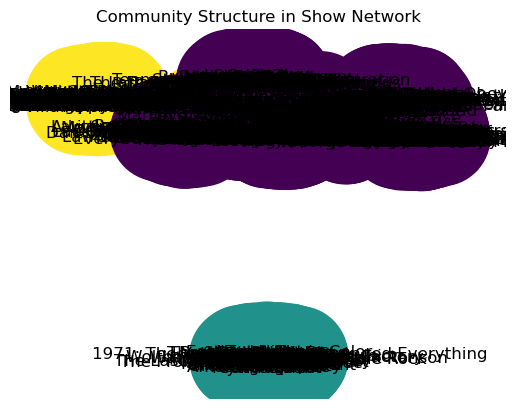

In [15]:
pos = nx.spring_layout(G) 
community_map = {node: i for i, community in enumerate(sorted_communities) for node in community}
colors = [community_map[node] for node in G.nodes()]
nx.draw_networkx(G, pos, node_color=colors, with_labels=True, node_size=5000, edge_color='gray')
plt.title('Community Structure in Show Network')
plt.axis('off')
plt.show()

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------